In [1]:
import pandas as pd
df=pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [2]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [3]:
# pip install scikit-learn

Text(0, 0.5, 'package')

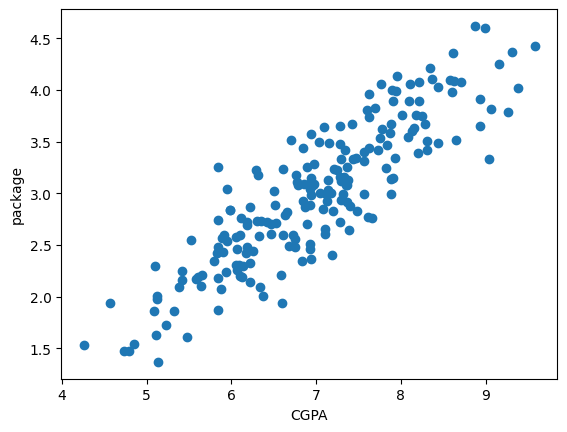

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("package")

In [5]:
X=df[['cgpa']]#independent feature/ i/p
y=df[['package']]#dependent feature/ o/p

In [6]:
X.shape

(200, 1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=39)

In [9]:
X_train

,cgpa
17,5.38
166,8.60
34,7.34
184,7.88
86,7.61
...,...
148,7.57
64,7.36
41,6.89
105,6.66


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()

In [12]:
print(dir(model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_decision_function', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'copy_X', 'fit', 'fit_intercept', 'get

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
#train acc
model.score(X_train,y_train)

0.7771775155761711

In [15]:
model.predict([[6.89]]),model.predict([[5.66]])

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[2.93592416]]), array([[2.23157937]]))

In [16]:
model.predict([[5.66]])

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.23157937]])

In [17]:
# y_test

In [18]:
# this is my bulk prediction
y_pred_test=model.predict(X_test)
# y_pred

In [19]:
from sklearn.metrics import r2_score

In [20]:
#test acc
r2_score(y_test,y_pred_test)

0.7510679098555051

In [21]:
#tran acc
y_pred_train=model.predict(X_train)
r2_score(y_train,y_pred_train)

0.7771775155761711

In [22]:
#pip install joblib
import joblib
# Save the model to a file
joblib.dump(model, 'regression_model.joblib')

['regression_model.joblib']

In [23]:
joblib_model = joblib.load('regression_model.joblib')

In [24]:
joblib_model.predict([[6.89]])

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.93592416]])

In [25]:
c=model.intercept_
c

array([-1.00955194])

In [26]:
m=model.coef_
m

array([[0.57263804]])

In [27]:
# y=mx+c
y=m*6.89+c
y

array([[2.93592416]])

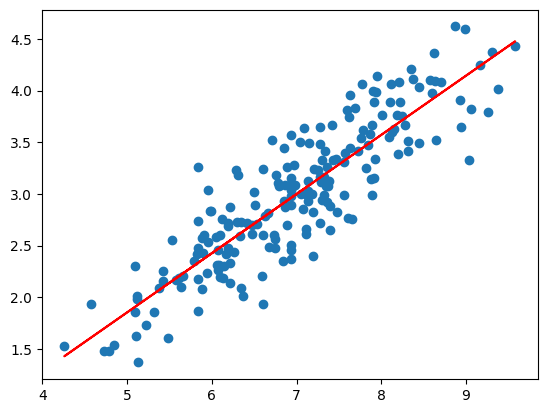

In [28]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,model.predict(X_train),color="red")

In [29]:
df.columns

Index(['cgpa', 'package'], dtype='object')

In [30]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [31]:
ridge=Ridge()

In [32]:
lasso=Lasso()

In [33]:
elasticnet=ElasticNet()

In [34]:
# print(dir(lasso))

In [35]:
ridge.fit(X_train,y_train)

Ridge()

In [36]:
y_pred_ridge=ridge.predict(X_test)


In [37]:
# train acc
ridge.score(X_train,y_train)

0.7771567679747468

In [38]:
#test acc 
r2_score(y_test,y_pred_ridge)

0.7513450538366603

In [39]:
lasso.fit(X_train,y_train)

Lasso()

In [40]:
y_pred_lasso=lasso.predict(X_test)

In [41]:
lasso.score(X_train,y_train)

0.0

In [42]:
r2_score(y_test,y_pred_lasso)

-0.08148501876839687

In [43]:
elasticnet.fit(X_train,y_train)

ElasticNet()

In [44]:
y_pred_el=elasticnet.predict(X_test)

In [45]:
elasticnet.score(X_train,y_train)

0.2721335909991155

In [46]:
r2_score(y_test,y_pred_el)

0.21914093234544307